#DỰ ÁN CÁ NHÂN: PHÂN LOẠI CHẤT LƯỢNG CỦA RƯỢU DỰA TRÊN CÁC YẾU TỐ HÓA HỌC
Đề tài "Dự đoán Chất lượng của Rượu dựa trên các yếu tố hóa học" là một dự án học máy vô cùng thú vị và hữu ích. Trong dự án này, chúng ta sẽ sử dụng dataset chứa thông tin về các yếu tố hóa học của rượu (ví dụ như nồng độ cồn, pH, axit) để xây dựng một mô hình dự đoán chất lượng của rượu. Dataset:[https://www.kaggle.com/datasets/yasserh/wine-quality-dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

In [ ]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving WineQT.csv to WineQT.csv


In [ ]:
file_name = 'WineQT.csv'

# Load dữ liệu vào dataframe
df = pd.read_csv(file_name)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# **Exploratory Data Analysis**

In [ ]:
#Hiển thị tên của các cột trong DataFrame.
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
#Tạo bảng thống kê mô tả và đổi chiều dọc
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
#Kiểm tra số dòng trùng lập
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [ ]:
#Đếm số dòng trùng lập trong DataFrame
df.duplicated().sum()

0

In [ ]:
#Hiển thị thông tin tổng quan về DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#Đếm số lượng giá trị thiếu (NaN) trong mỗi cột của DataFrame.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
#Đếm số lượng mẫu cho mỗi giá trị unique trong cột "quality" và hiển thị năm giá trị đầu tiên.
df.quality.value_counts().head()

5    483
6    462
7    143
4     33
8     16
Name: quality, dtype: int64

# **Visualization**

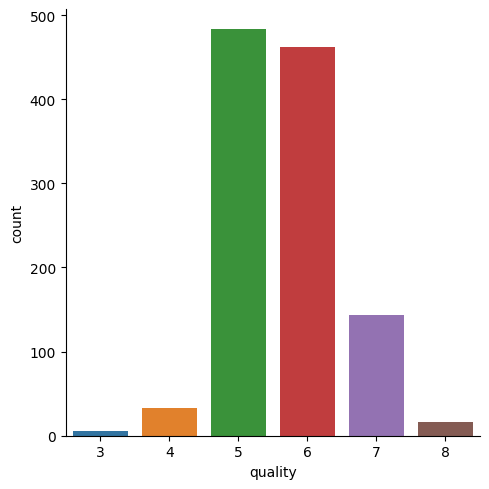

In [ ]:
#Vẽ biểu đồ dạng categorical plot cho cột "quality" trong DataFrame.
sns.catplot(x="quality",data=df,kind="count")

<Axes: xlabel='quality', ylabel='residual sugar'>

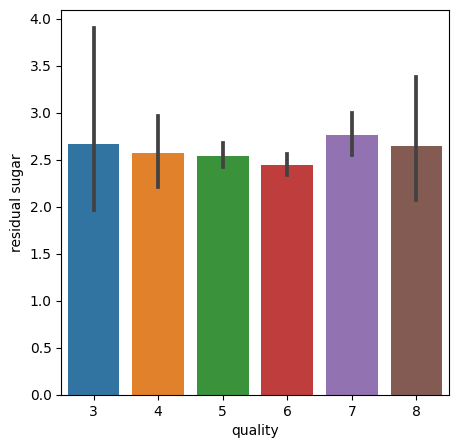

In [ ]:
#Vẽ biểu đồ barplot để xem mối quan hệ giữa chất lượng và hàm lượng đường dư.
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="residual sugar",data=df)

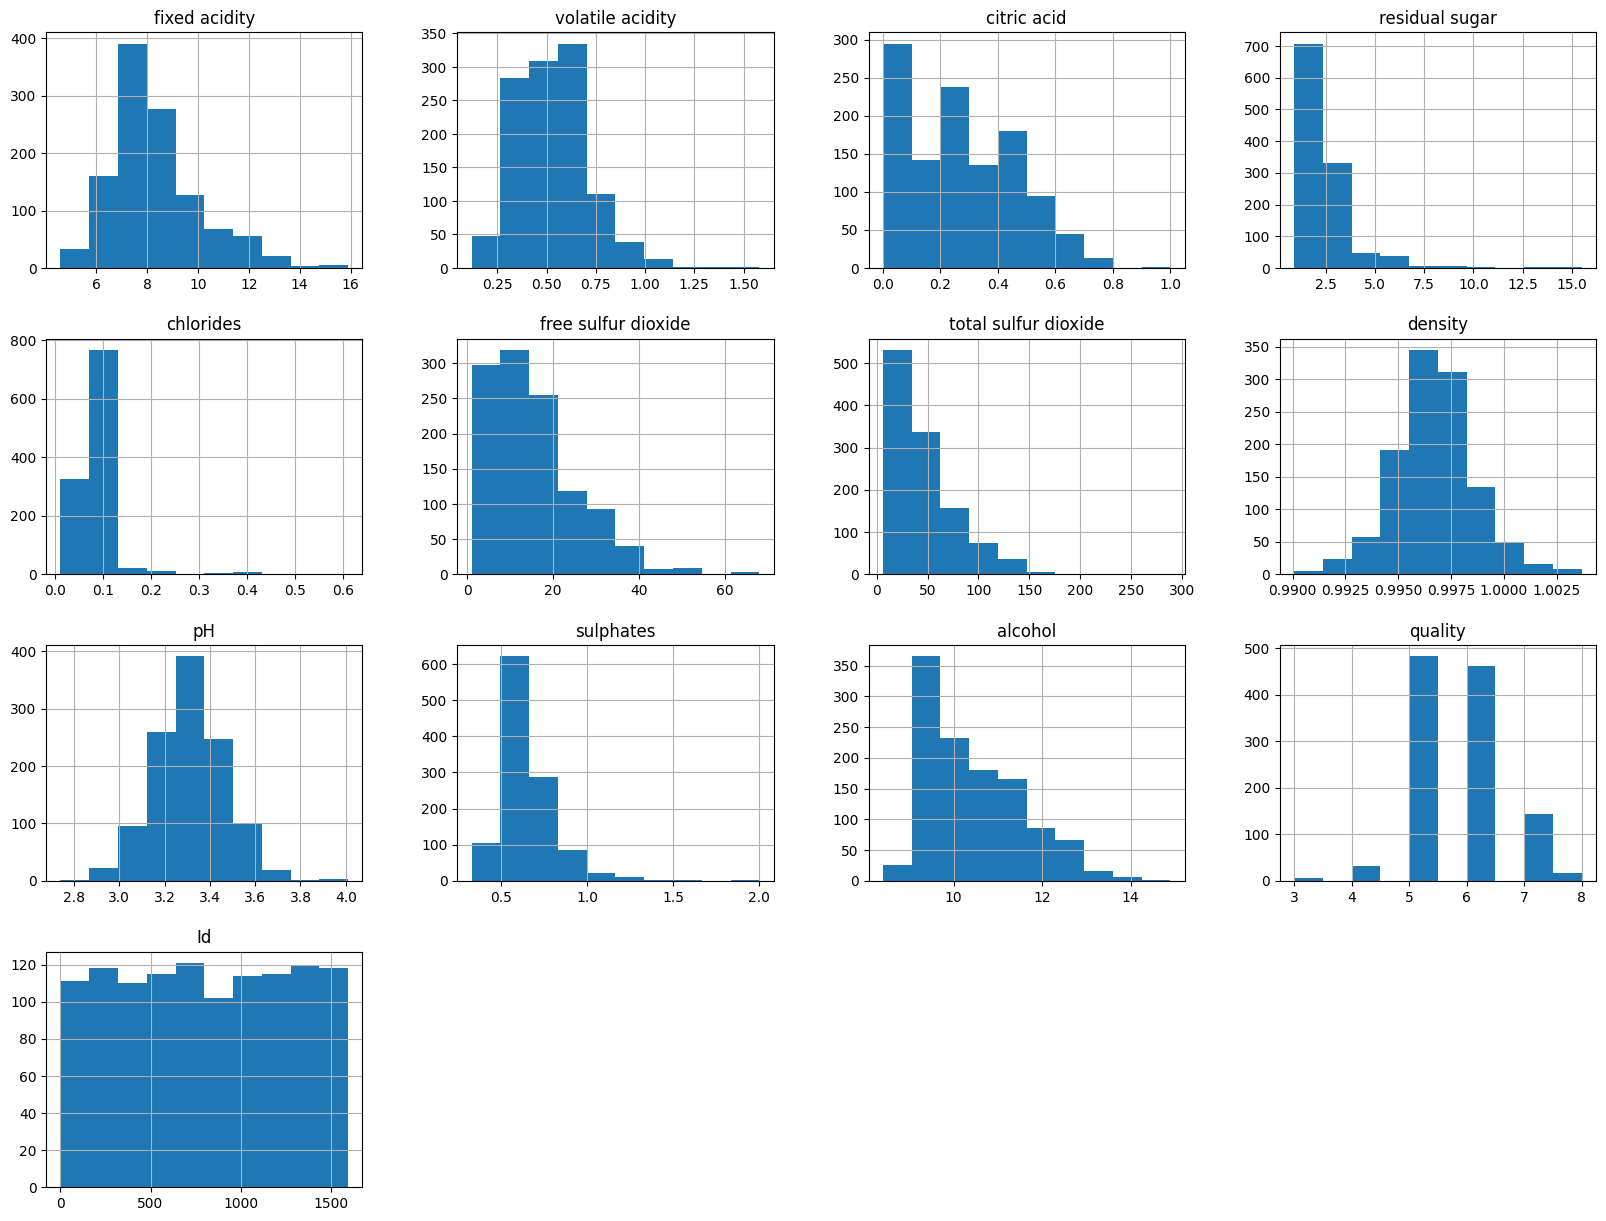

In [ ]:
#Vẽ histogram cho tất cả các cột trong DataFrame để xem phân phối của từng biến.
df.hist(figsize=(20,15))
plt.show()

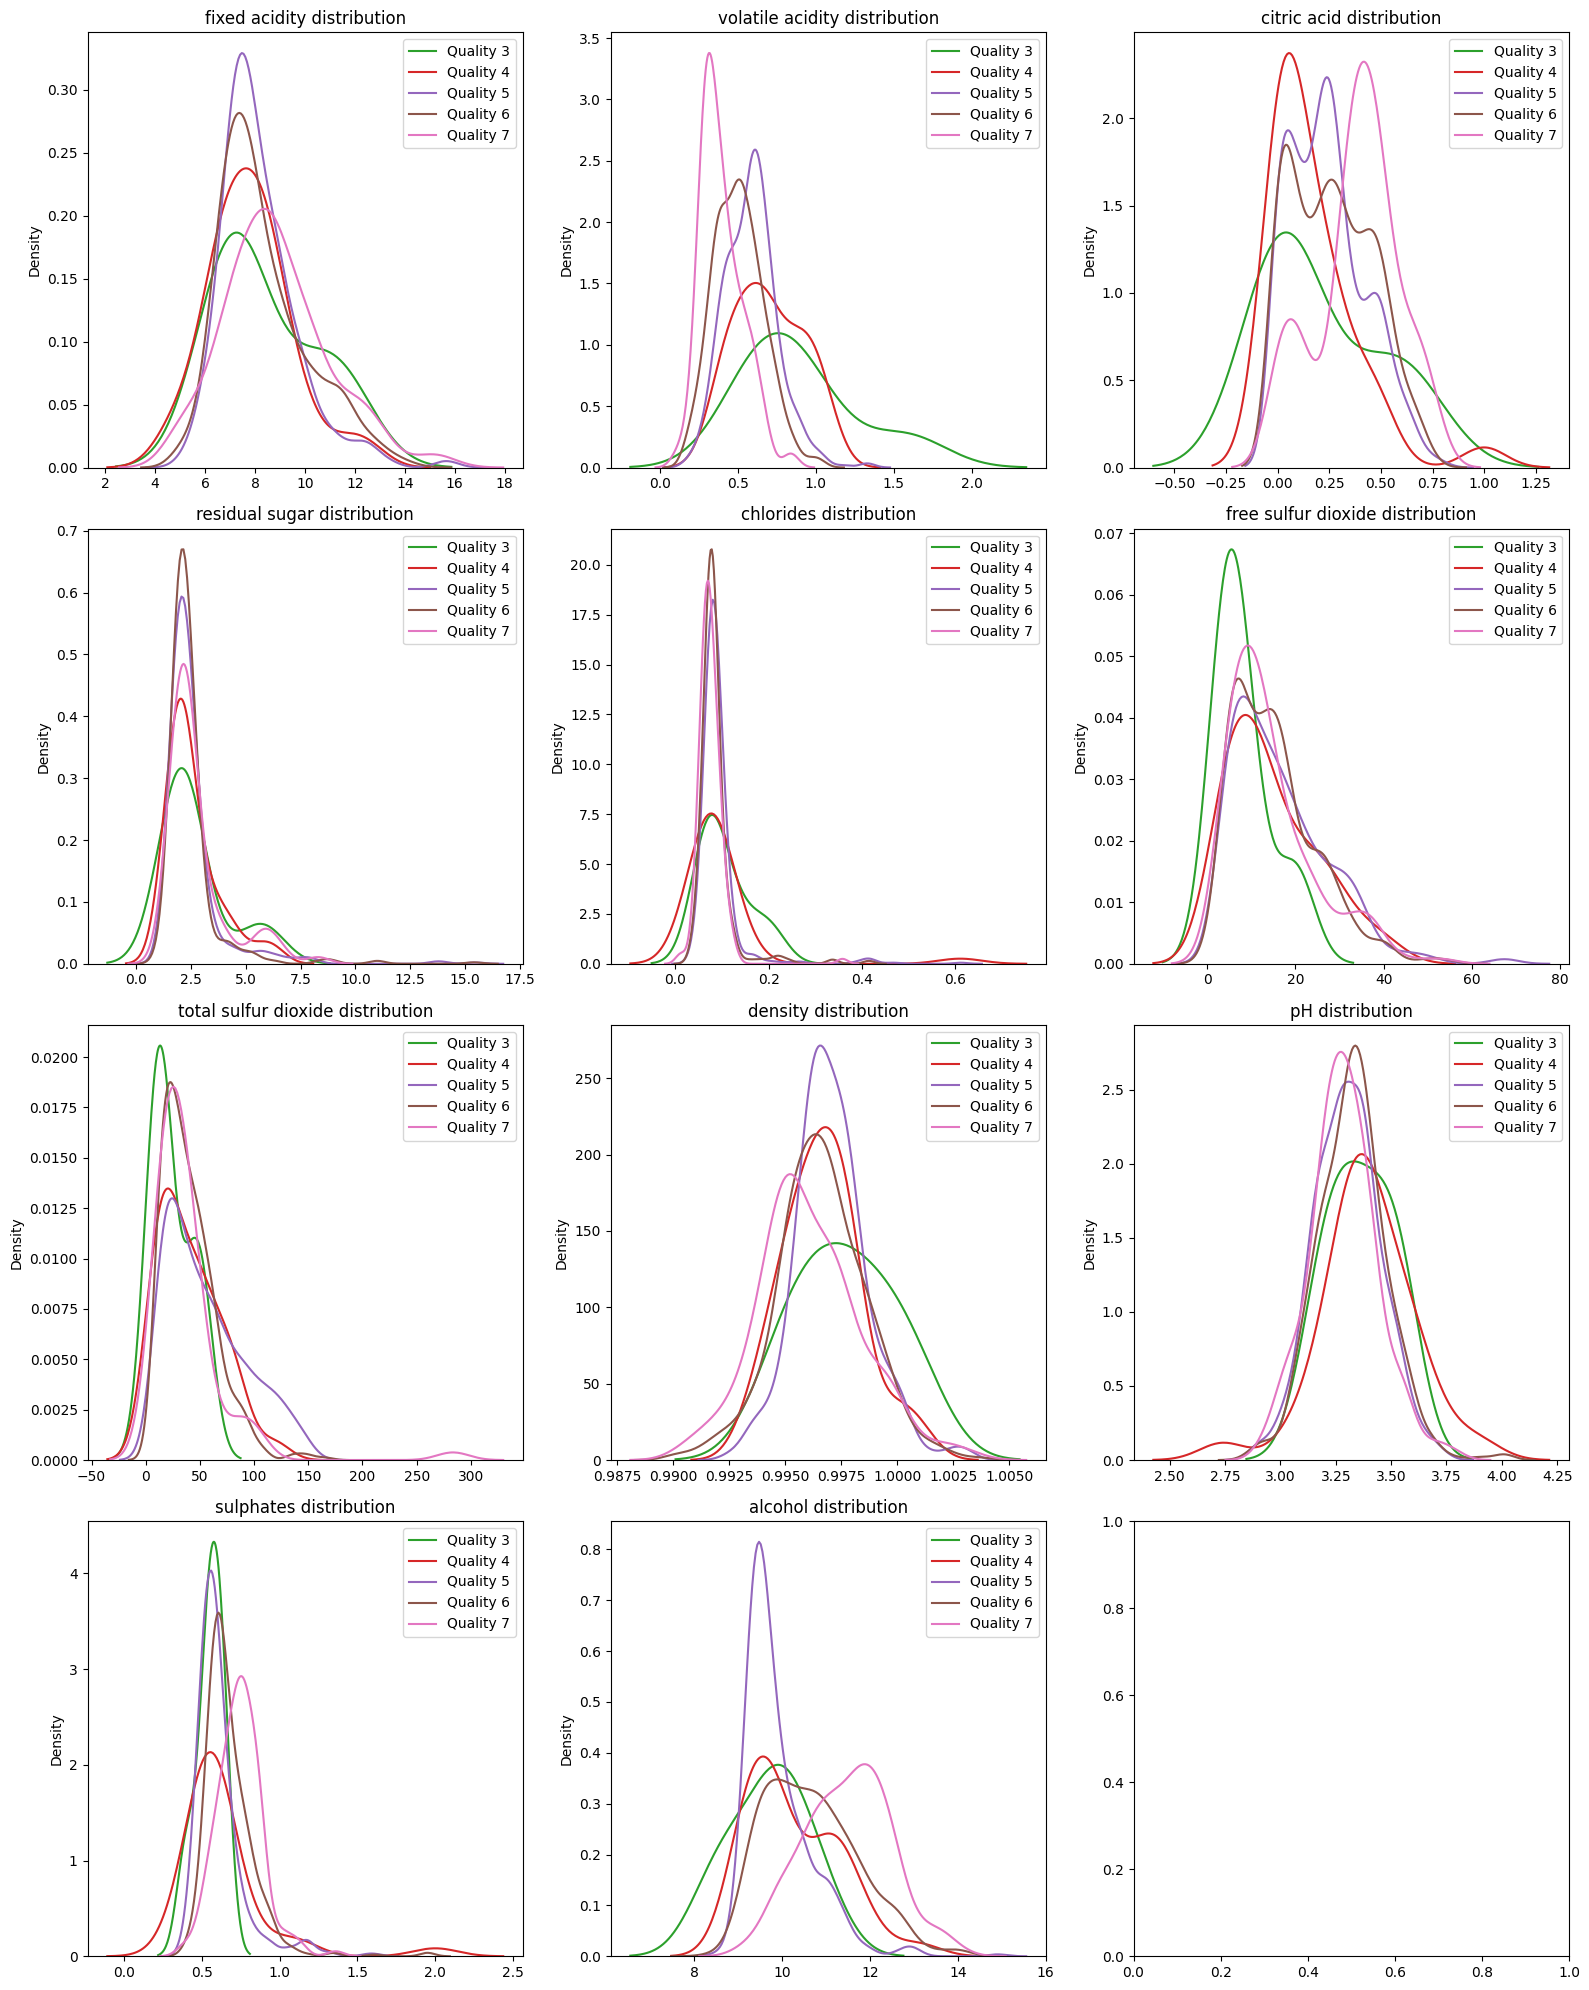

In [ ]:
#Tạo lưới chứa các KDE plots
cols_to_draw = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']
cols = 3
rows = int(np.ceil(len(cols_to_draw) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 5))
ax = ax.flatten()

quality_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for x, col in enumerate(cols_to_draw):
    for quality in range(1, 8):
        sns.kdeplot(data=df[df['quality'] == quality][col], ax=ax[x], color=quality_colors[quality - 1],
                    common_norm=False, label=f'Quality {quality}')
    ax[x].set_title(f'{col} distribution')
    ax[x].set_xlabel(None)
    ax[x].legend()

plt.tight_layout()
plt.show()

<Axes: >

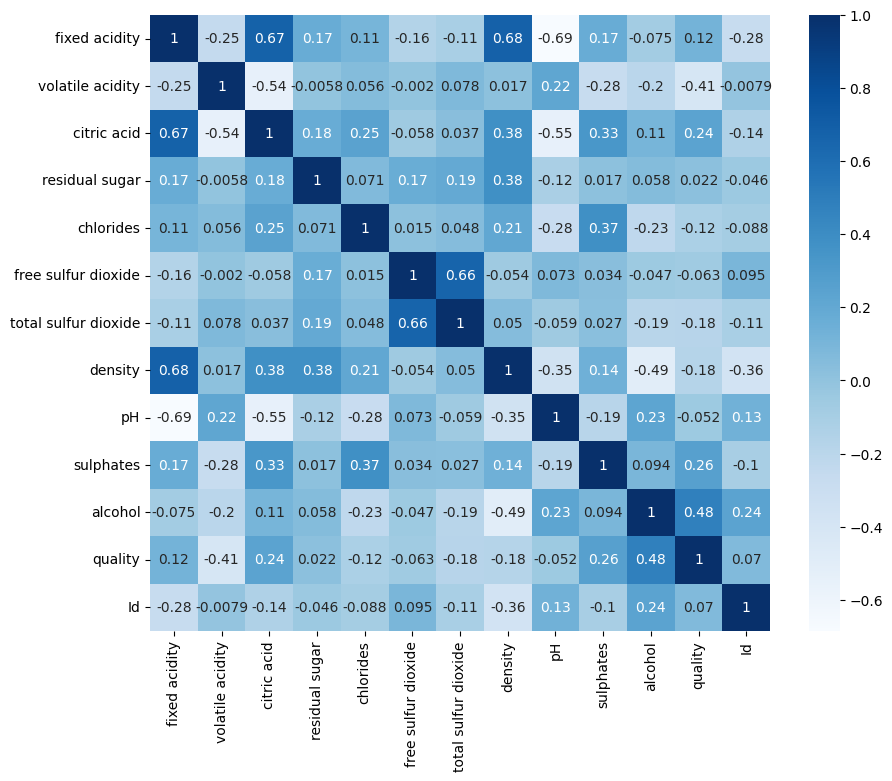

In [ ]:
#Vẽ một heatmap để biểu diễn ma trận tương quan giữa các biến.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Text(0.5, 0, 'Value')

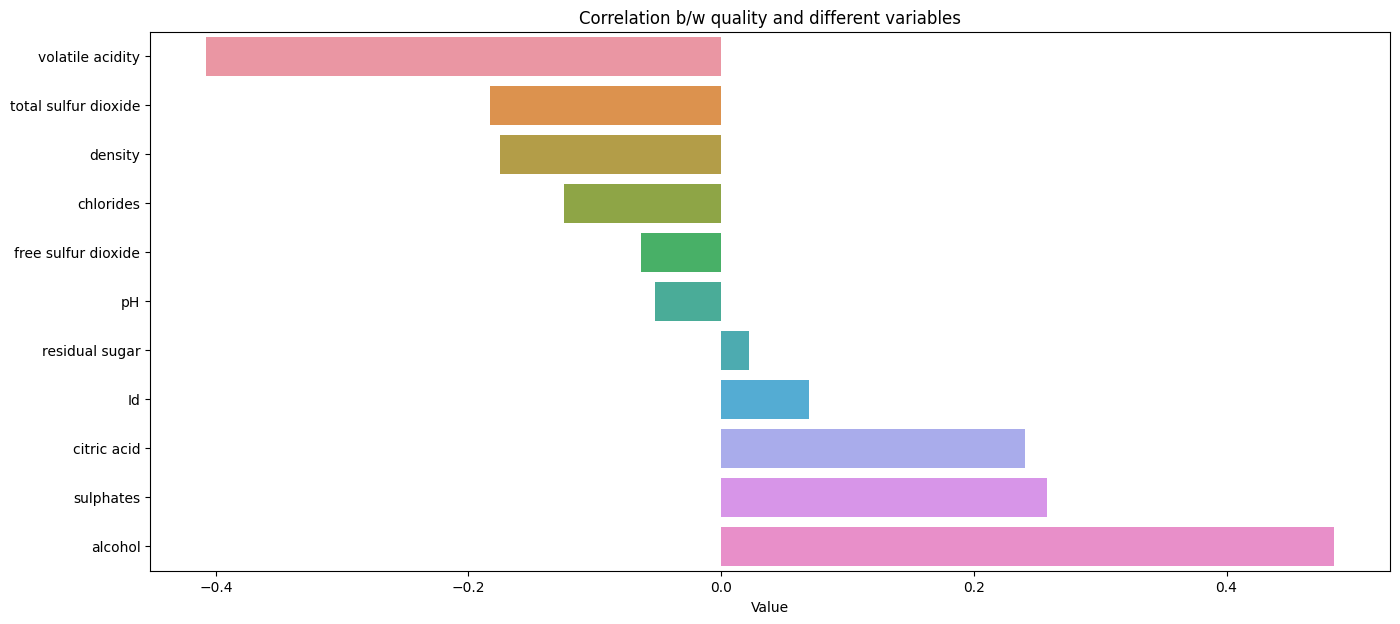

In [ ]:
#Tính toán tương quan giữa chất lượng và các biến khác và vẽ một barplot để hiển thị tương quan này.
d_corr=df.corr()['quality'][1:].drop('quality',axis=0)

plt.figure(figsize=(16,7))
plt.title('Correlation b/w quality and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')

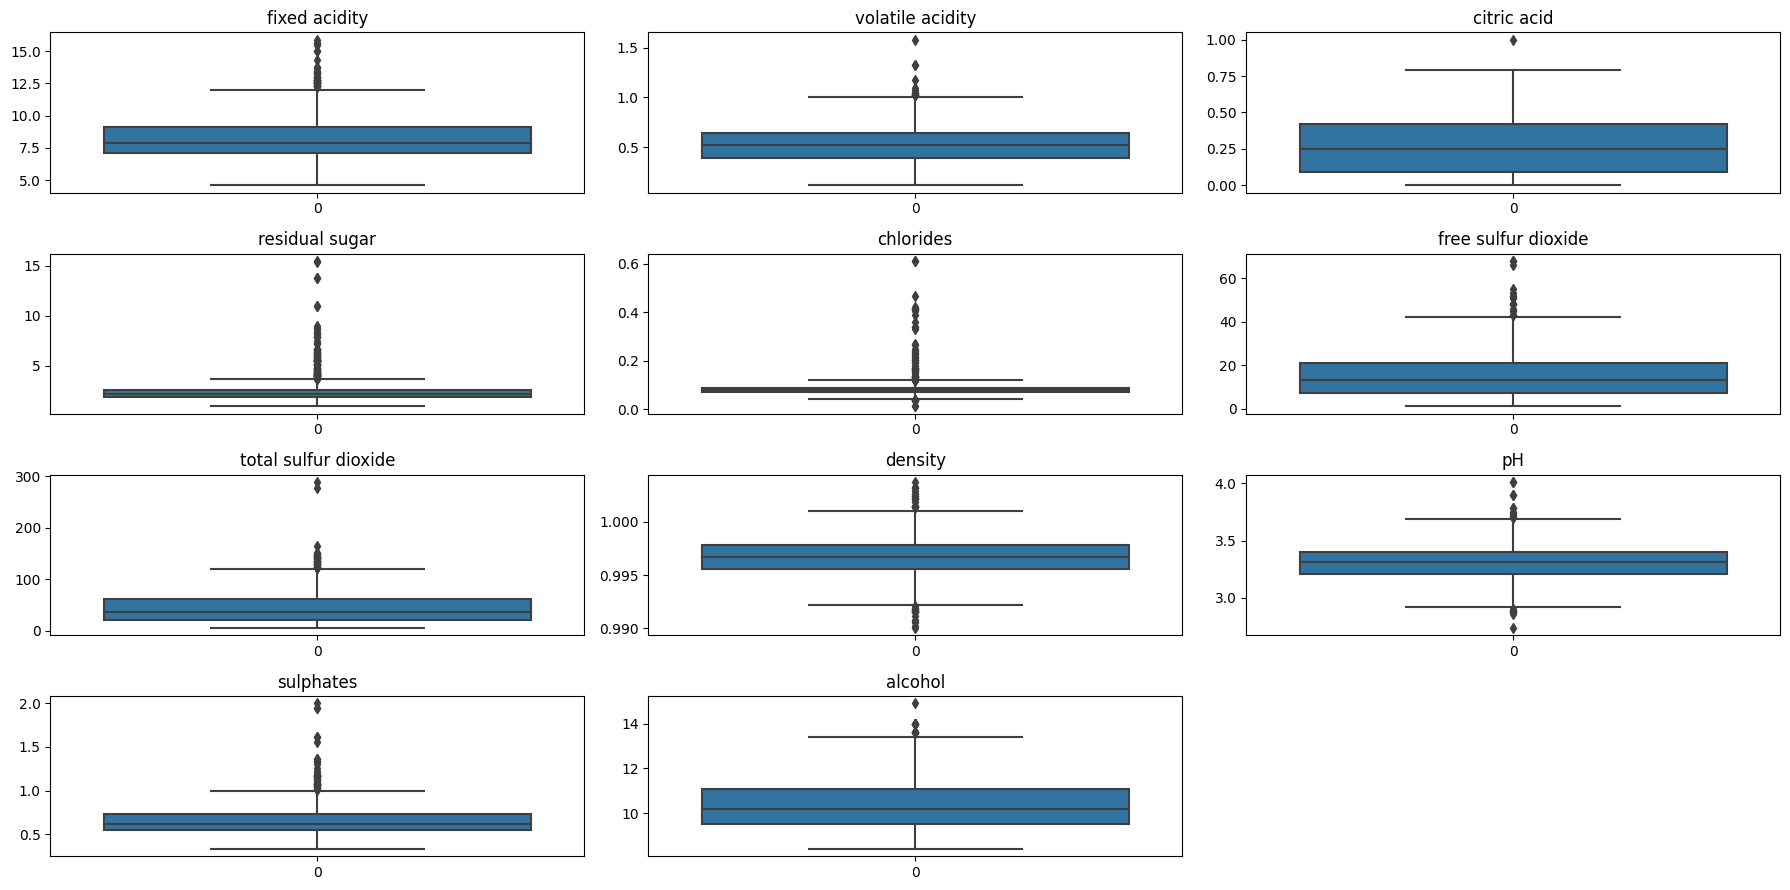

In [ ]:
# Outliers
plt.figure(figsize=(18, 9))
o_count = 1
for i in cols_to_draw:
    plt.subplot(4, 3, o_count)
    sns.boxplot(df[i])
    plt.title(f'{i}')
    o_count = o_count + 1
plt.tight_layout()
plt.show()

In [ ]:
df=df.copy()
#hiển thị số lượng mẫu cho mỗi giá trị unique trong cột "quality" của DataFrame.
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

# **DATA PREPROCESSING**

In [ ]:
#Tạo DataFrame mới x bằng cách loại bỏ cột "quality" từ DataFrame ban đầu df
x=df.drop("quality",axis=1)
y=df.quality

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [ ]:
#Tạo Series y để làm mục tiêu cho mô hình
y= df['quality'].apply(lambda y_values :1 if y_values>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [ ]:
#Hiển thị các giá trị duy nhất có trong Series y
y.unique()

array([0, 1])

In [ ]:
#Import thư viện
from sklearn.model_selection import train_test_split
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
#In ra kích thước của các tập dữ liệu
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(857, 12)
(857,)
(286, 12)
(286,)


In [ ]:
#Import thư viện
from sklearn.preprocessing import StandardScaler
#Chuẩn hóa dữ liệu.
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# **Modelling**

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8391608391608392


In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       248
           1       0.41      0.47      0.44        38

    accuracy                           0.84       286
   macro avg       0.66      0.68      0.67       286
weighted avg       0.85      0.84      0.84       286



Decision Tree và số lá tối đa là 2 có Accuracy: 0.84

In [ ]:
model_eval=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
model_eval.mean()

0.8635567715458276

Mã tính toán trung bình của các điểm số trong cross-validation : 0.8635567715458276

##**Cải tiến lần 1: RandomForest**

 Trong phương pháp này,thay vì sử dụng Decision Tree đơn lẻ, chúng ta sử dụng một mô hình Random Forest, một phương pháp kết hợp nhiều Decision Trees, cùng với tinh chỉnh siêu tham số để cải thiện hiệu suất.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [ ]:
print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8671328671328671


In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       242
           1       0.62      0.36      0.46        44

    accuracy                           0.87       286
   macro avg       0.75      0.66      0.69       286
weighted avg       0.85      0.87      0.85       286



Thuật toán Random Forest cải thiện Decison tree tăng Accuracy từ 0,83 lên 0,87

In [ ]:
model_eval=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
model_eval.mean()

0.913652530779754

Mã tính toán trung bình của các điểm số trong cross-validation cũng tăng từ 0.8671328671328671 lên 0.913652530779754

Rõ ràng và cho sự lựa chọn tối ưu hơn khi sử dụng RandomForest trong Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Thiết lập siêu tham số muốn tinh chỉnh
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Thêm các siêu tham số khác cần tinh chỉnh ở đây
}

# Thiết lập mô hình
model = RandomForestClassifier(random_state=42)

# Sử dụng Grid Search
grid_search = GridSearchCV(model, param_grid, cv=7, scoring='accuracy')
grid_search.fit(x_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters:", grid_search.best_params_)

# Sử dụng mô hình với siêu tham số tốt nhất để đánh giá trên tập kiểm tra
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Đánh giá hiệu suất với siêu tham số tốt nhất
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best parameters: {:.2f}".format(accuracy))

Best parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy with best parameters: 0.86


Phương pháp này đưa ra lựa chọn cho tham số tối ưu nhất mà cũng làm cải thiện accuracy tăng lên từ 0,83 lên 0,86

##**Cải thiện lần 2:  Regularization**
Trong học máy, Regularization là một kỹ thuật được sử dụng để ngăn chặn mô hình quá khớp (overfitting). Trong mô hình cây quyết định (Decision Tree), việc Regularization có thể được thực hiện bằng cách điều chỉnh các siêu tham số để kiểm soát độ sâu của cây và số lượng mẫu tối thiểu ở các nút lá

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Decision Tree Classifier
model = DecisionTreeClassifier()

# Thiết lập các tham số cần điều chỉnh
parameters = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng GridSearchCV để tìm ra các tham số tối ưu
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(x_train, y_train)

# In ra các tham số tối ưu
print("Best Parameters: ", grid_search.best_params_)

# Sử dụng mô hình với các tham số tối ưu
best_model = grid_search.best_estimator_

# Huấn luyện mô hình với dữ liệu huấn luyện
best_model.fit(x_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))



Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       261
           1       0.30      0.52      0.38        25

    accuracy                           0.85       286
   macro avg       0.62      0.70      0.65       286
weighted avg       0.89      0.85      0.87       286



Sau khi cải tiến Accuracy đã tăng lên 0,85

## **Cải thiện lần 3: Bagging**

Sử dụng kỹ thuật Bagging để tạo ra nhiều mô hình Decision Trees từ các tập con của dữ liệu huấn luyện. Kết quả từ việc kết hợp các mô hình có thể cải thiện hiệu suất dự đoán.

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Khởi tạo mô hình Decision Tree
base_model = DecisionTreeClassifier()

# Sử dụng Bagging với Decision Tree
model = BaggingClassifier(base_model, n_estimators=100)

# Huấn luyện mô hình
model.fit(x_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(x_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       260
           1       0.41      0.69      0.51        26

    accuracy                           0.88       286
   macro avg       0.69      0.80      0.72       286
weighted avg       0.92      0.88      0.89       286



Các giá trị Accuracy, precision và recall đã tăng lên . Bộ phân loại hiện đạt độ chính xác 0,88, tăng từ mức 0.83 trước đó.